In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


## Prepare Dataset

In [3]:
train_dataset_path = './dataset/dataset-training-preprocessed/Text_PreprocessingV2_Train.csv'
valid_dataset_path = './dataset/dataset-training-preprocessed/Text_PreprocessingV2_Valid.csv'





In [8]:
train_df = pd.read_csv(train_dataset_path, sep=',', header=None, usecols=[2,7], skiprows=1)
valid_df = pd.read_csv(valid_dataset_path, sep=',', header=None, usecols=[2,7], skiprows=1)

train_df.columns = ['label', 'tweet_tokens_stemmed']
valid_df.columns = ['label', 'tweet_tokens_stemmed']


In [9]:
train_df.head(10)

,label,tweet_tokens_no_stemming
0,positive,"['warung', 'dimiliki', 'pengusaha', 'pabrik', ..."
1,neutral,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,positive,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,positive,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,negative,"['duh', 'mahasiswa', 'jangan-jangan', 'sombong..."
5,positive,"['makanan', 'beragam', 'harga', 'makanan', 'fo..."
6,negative,"['pakai', 'kartu', 'kredit', 'baca', 'tidak', ..."
7,positive,"['unik', 'bagus', 'foto-foto', 'makanan', 'ena..."
8,positive,"['keluarga', 'menikmati', 'pengalaman', 'kulin..."
9,positive,['bersyukur']


In [10]:
jumlah_positives = (train_df['label'] == 2).sum()
print(f'Jumlah sentimen positif: {jumlah_positives}')

jumlah_negatives = (train_df['label'] == 1).sum()
print(f'Jumlah sentimen negatif: {jumlah_negatives}')

jumlah_netral = (train_df['label'] == 0).sum()
print(f'Jumlah sentimen netral: {jumlah_netral}')

jumlah_positives_valid = (valid_df['label'] == 2).sum()
print(f'Jumlah sentimen positif: {jumlah_positives_valid}')

jumlah_negatives_valid = (valid_df['label'] == 1).sum()
print(f'Jumlah sentimen negatif: {jumlah_negatives_valid}')

jumlah_netral_valid = (valid_df['label'] == 0).sum()
print(f'Jumlah sentimen netral: {jumlah_netral_valid}')

jumlah_total_positif = jumlah_positives + jumlah_positives_valid
print(f'Jumlah total: {jumlah_total_positif}')

jumlah_total_negatif = jumlah_negatives + jumlah_negatives_valid
print(f'Jumlah total: {jumlah_total_negatif}')

jumlah_total_netral = jumlah_netral + jumlah_netral_valid
print(f'Jumlah total: {jumlah_total_netral}')



Jumlah sentimen positif: 0
Jumlah sentimen negatif: 0
Jumlah sentimen netral: 0
Jumlah sentimen positif: 0
Jumlah sentimen negatif: 0
Jumlah sentimen netral: 0
Jumlah total: 0
Jumlah total: 0
Jumlah total: 0


In [11]:
train_df.head(10)

,label,tweet_tokens_no_stemming
0,positive,"['warung', 'dimiliki', 'pengusaha', 'pabrik', ..."
1,neutral,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,positive,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,positive,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,negative,"['duh', 'mahasiswa', 'jangan-jangan', 'sombong..."
5,positive,"['makanan', 'beragam', 'harga', 'makanan', 'fo..."
6,negative,"['pakai', 'kartu', 'kredit', 'baca', 'tidak', ..."
7,positive,"['unik', 'bagus', 'foto-foto', 'makanan', 'ena..."
8,positive,"['keluarga', 'menikmati', 'pengalaman', 'kulin..."
9,positive,['bersyukur']


In [53]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
train_df["tweet_join"] = train_df["tweet_tokens_stemmed"].apply(join_text_list)
valid_df["tweet_join"] = valid_df["tweet_tokens_stemmed"].apply(join_text_list)

train_df["tweet_join"].head()

0    warung milik usaha pabrik puluh kenal putih ba...
1    mohon ulama lurus mmbri hujjah partai diwlh su...
2    lokasi strategis jalan sumatera bandung nyaman...
3    betapa bahagia unboxing paket barang bagus tet...
4    duh mahasiswa sombong kasih kartu kuning ajar ...
Name: tweet_join, dtype: object

In [54]:
train_df

,label,tweet_tokens_stemmed,tweet_join
0,2,"['warung', 'milik', 'usaha', 'pabrik', 'puluh'...",warung milik usaha pabrik puluh kenal putih ba...
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',...",mohon ulama lurus mmbri hujjah partai diwlh su...
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '...",lokasi strategis jalan sumatera bandung nyaman...
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba...",betapa bahagia unboxing paket barang bagus tet...
4,1,"['duh', 'mahasiswa', 'sombong', 'kasih', 'kart...",duh mahasiswa sombong kasih kartu kuning ajar ...
...,...,...,...
10996,2,"['enak', 'masakan', 'kepiting', 'senang', 'pil...",enak masakan kepiting senang pilih kepiting se...
10997,0,"['hormat', 'partaipartai', 'koalisi']",hormat partaipartai koalisi
10998,1,"['pagi', 'pagi', 'tol', 'pasteur', 'macet', 'p...",pagi pagi tol pasteur macet parah jengkel
10999,2,"['belanja', 'yogya', 'riau', 'junction', 'kali...",belanja yogya riau junction kali lihat foodlif...


## Generate Padded Sequence

In [55]:
# Parameters

vocab_size = 20000
max_length = 100
embedding_dim = 8
trunc_type='post'
oov_tok = "<OOV>"

In [56]:
## Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate word index dictionary for the training sentences
tokenizer.fit_on_texts(train_df['tweet_join'])
word_index = tokenizer.word_index
print(word_index)

# Convert the training sentences into word sequences
train_sequences = tokenizer.texts_to_sequences(train_df['tweet_join'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Convert the validation sentences into word sequences
valid_sequences = tokenizer.texts_to_sequences(valid_df['tweet_join'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)

{'<OOV>': 1, 'makan': 2, 'enak': 3, 'harga': 4, 'bandung': 5, 'menu': 6, 'banget': 7, 'restoran': 8, 'layan': 9, 'pilih': 10, 'coba': 11, 'suasana': 12, 'nyaman': 13, 'malam': 14, 'jalan': 15, 'suka': 16, 'goreng': 17, 'ayam': 18, 'pandang': 19, 'bagus': 20, 'nasi': 21, 'mahal': 22, 'orang': 23, 'keluarga': 24, 'lumayan': 25, 'saji': 26, 'pesan': 27, 'lokasi': 28, 'minum': 29, 'cocok': 30, 'nikmat': 31, 'kota': 32, 'pas': 33, 'resto': 34, 'salah': 35, 'porsi': 36, 'steak': 37, 'sedia': 38, 'kali': 39, 'rumah': 40, 'sunda': 41, 'deh': 42, 'khas': 43, 'rekomendasi': 44, 'indonesia': 45, 'murah': 46, 'kafe': 47, 'jangkau': 48, 'masakan': 49, 'oke': 50, 'teman': 51, 'mi': 52, 'bakar': 53, 'pakai': 54, 'ramai': 55, 'favorit': 56, 'bakso': 57, 'ramah': 58, 'jam': 59, 'mantap': 60, 'tambah': 61, 'letak': 62, 'siang': 63, 'daging': 64, 'sambal': 65, 'cepat': 66, 'masuk': 67, 'unjung': 68, 'kecewa': 69, 'kunjung': 70, 'luas': 71, 'parkir': 72, 'pedas': 73, 'cari': 74, 'segar': 75, 'beli': 76, '

In [57]:
import pickle

# Simpan tokenizer ke dalam file
with open('tokenizer-3classes.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [58]:
sample_sentences = train_df['tweet_join'][0]
print(train_df["label"][0])
sample_sequences = train_sequences[0]
print(sample_sentences)
print(sample_sequences)

2
warung milik usaha pabrik puluh kenal putih bandung kualitas padu ahli masak padu kretivitas warung saji menu utama bahan tambah menu ayam selera indonesia harga jangkau lewat bletoka kalah asli tegal
[137, 104, 516, 2621, 867, 106, 386, 5, 111, 447, 2622, 273, 447, 6616, 137, 26, 6, 252, 448, 61, 6, 18, 205, 45, 4, 48, 387, 6617, 247, 262, 6618]


In [59]:
print(train_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  137
  104  516 2621  867  106  386    5  111  447 2622  273  447 6616  137
   26    6  252  448   61    6   18  205   45    4   48  387 6617  247
  262 6618]


In [15]:
from gensim.models import Word2Vec

# use pretrained model from wiki id
# w2v_model = Word2Vec.load("./model/idwiki_word2vec_100.model")


sentences = [sentence.split() for sentence in train_df['tweet_join']]
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=1, workers=4)

In [17]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [18]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[1100])
print(word)

('jempol', array([-0.18342532, -0.16802882,  0.1531205 ,  0.51217741,  0.622262  ,
       -0.33897492,  0.94837153, -0.0898219 ]))


## Build and Compile Model

In [26]:



model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 8,  embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_shape=(max_length,), trainable=False),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 8)            │    160,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_2 (Conv1D)               │ (None, 96, 128)           │      5,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_2          │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 16)                │      2,064 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 3)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 167,363 (653.76 KB)

 Trainable params: 167,363 (653.76 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Looping untuk mendapatkan bobot dari setiap layer
for layer in model.layers:
    # Mengecek apakah layer memiliki bobot
    if layer.weights:
        print("Layer Name:", layer.name)
        # Mendapatkan bobot dan bias dari layer
        weights = layer.get_weights()
        for i, w in enumerate(weights):
            print("Weights Shape (Tensor {}):".format(i), w.shape)
            print("Weights (Tensor {}):".format(i))
            print(w)


Layer Name: embedding_1
Weights Shape (Tensor 0): (20000, 8)
Weights (Tensor 0):
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.6732393  -5.0614443   1.6585246  ... -2.5212414   5.6106114
  -0.08356148]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Layer Name: conv1d_1
Weights Shape (Tensor 0): (5, 8, 128)
Weights (Tensor 0):
[[[ 0.09265324  0.03046916  0.00851422 ...  0.08532408  0.0858582
    0.00153246]
  [-0.04052419 -0.03713845 -0.05257323 ...  0.06325744  0.07862356
   -0.06423625]
  [-0.06853952 -0.07971871  0.0212624  ... -0.04206032 -0.08342148
   -0.07012521]
  ...
  [ 0.02786218 -0.07353002 -0.02457499 ... -0.04275539  0.0240089
    0.01647663]
  [ 0.02565571  0.06497739 -0.08702368 ... -0.0045722

## Train Model

In [27]:
num_epochs = 8

history = model.fit(train_padded, train_df['label'], epochs=num_epochs, validation_data=(valid_padded, valid_df['label']), verbose=2)


Epoch 1/8
344/344 - 5s - 13ms/step - accuracy: 0.6959 - loss: 0.7329 - val_accuracy: 0.7659 - val_loss: 0.5982
Epoch 2/8
344/344 - 2s - 7ms/step - accuracy: 0.7316 - loss: 0.6629 - val_accuracy: 0.7683 - val_loss: 0.5779
Epoch 3/8
344/344 - 2s - 7ms/step - accuracy: 0.7390 - loss: 0.6143 - val_accuracy: 0.7833 - val_loss: 0.5269
Epoch 4/8
344/344 - 2s - 7ms/step - accuracy: 0.7640 - loss: 0.5593 - val_accuracy: 0.8111 - val_loss: 0.5022
Epoch 5/8
344/344 - 2s - 7ms/step - accuracy: 0.7856 - loss: 0.5172 - val_accuracy: 0.8167 - val_loss: 0.4802
Epoch 6/8
344/344 - 2s - 7ms/step - accuracy: 0.8217 - loss: 0.4595 - val_accuracy: 0.8325 - val_loss: 0.4598
Epoch 7/8
344/344 - 2s - 7ms/step - accuracy: 0.8360 - loss: 0.4097 - val_accuracy: 0.8230 - val_loss: 0.4710
Epoch 8/8
344/344 - 2s - 7ms/step - accuracy: 0.8539 - loss: 0.3625 - val_accuracy: 0.8381 - val_loss: 0.4591


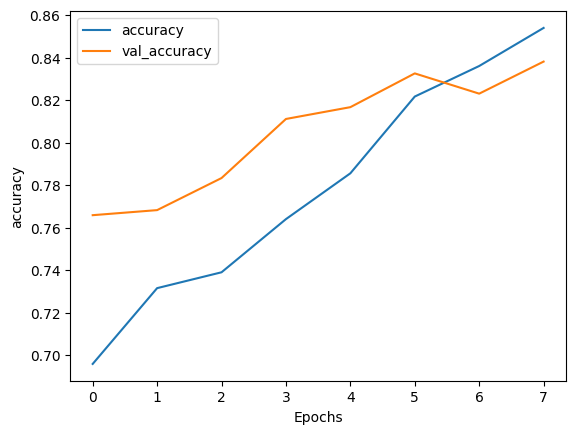

In [28]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

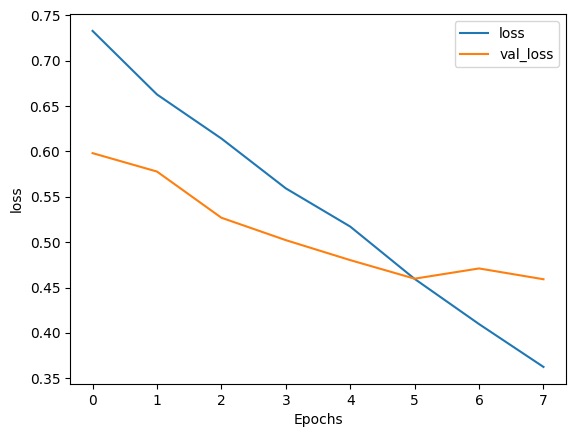

In [29]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")

In [60]:
## test model with predict one example sentence
sample_text = ["gila kalah gue apresiasi penuh indonesia gila main enak banget lihat kagak takut aussie mimpi timnas main enjoy"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating=trunc_type)
print(model.predict(sample_padded))

## convert predict to label
def get_label(predict):
    if predict == 2:
        return 'positive'
    if predict == 1:
        return 'negative'
    if predict == 0:
        return 'neutral'
    
print(get_label(np.argmax(model.predict(sample_padded))))    



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[0.06129953 0.5547677  0.38393277]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
negative


In [31]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(valid_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

print (y_pred_classes.shape)
print (y_pred.shape)

# Mencetak classification report
print(classification_report(valid_df["label"], y_pred_classes))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(1260,)
(1260, 3)
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       131
           1       0.82      0.75      0.78       394
           2       0.88      0.91      0.89       735

    accuracy                           0.84      1260
   macro avg       0.79      0.78      0.78      1260
weighted avg       0.84      0.84      0.84      1260



In [32]:
#save model
model.save('./model/model-cnn-word2vec-3-classes-stemming.h5')